# Birds eye view of Dataset

### Libraries

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [33]:
base_path = 'data_EDA'
categories = ['Blue', 'Black', 'White', 'Gray']

### Display MetaData

In [34]:
def load_image_metadata(base_path, categories):
    data = []
    for category in categories:
        category_path = os.path.join(base_path, category)
        for filename in os.listdir(category_path):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(category_path, filename)
                with Image.open(img_path) as img:
                    width, height = img.size
                data.append({
                    'file_name': filename,
                    'category': category,
                    'path': img_path,
                    'width': width,
                    'height': height
                })
    return pd.DataFrame(data)

df = load_image_metadata(base_path, categories)
print(df)

        file_name category                        path  width  height
0      blue_1.jpg     Blue    data_EDA\Blue\blue_1.jpg    474     550
1     blue_10.jpg     Blue   data_EDA\Blue\blue_10.jpg    256     256
2    blue_100.jpg     Blue  data_EDA\Blue\blue_100.jpg    256     256
3     blue_11.jpg     Blue   data_EDA\Blue\blue_11.jpg    474     474
4     blue_12.jpg     Blue   data_EDA\Blue\blue_12.jpg    300     300
..            ...      ...                         ...    ...     ...
366     gray7.jpg     Gray     data_EDA\Gray\gray7.jpg    513     655
367   gray70.jpeg     Gray   data_EDA\Gray\gray70.jpeg   3648    5472
368    gray71.jpg     Gray    data_EDA\Gray\gray71.jpg    626     626
369     gray8.jpg     Gray     data_EDA\Gray\gray8.jpg   2000    2667
370     gray9.jpg     Gray     data_EDA\Gray\gray9.jpg    513     655

[371 rows x 5 columns]


### Image statistics

In [35]:
# Number of images per category
print(df['category'].value_counts())

# Image dimensions statistics
print(df[['width', 'height']].describe())

category
Blue     100
Black    100
White    100
Gray      71
Name: count, dtype: int64
             width       height
count   371.000000   371.000000
mean    550.781671   677.908356
std     411.224162   549.108759
min     183.000000   200.000000
25%     474.000000   474.000000
50%     474.000000   632.000000
75%     513.000000   655.000000
max    3648.000000  5472.000000


### Sample set

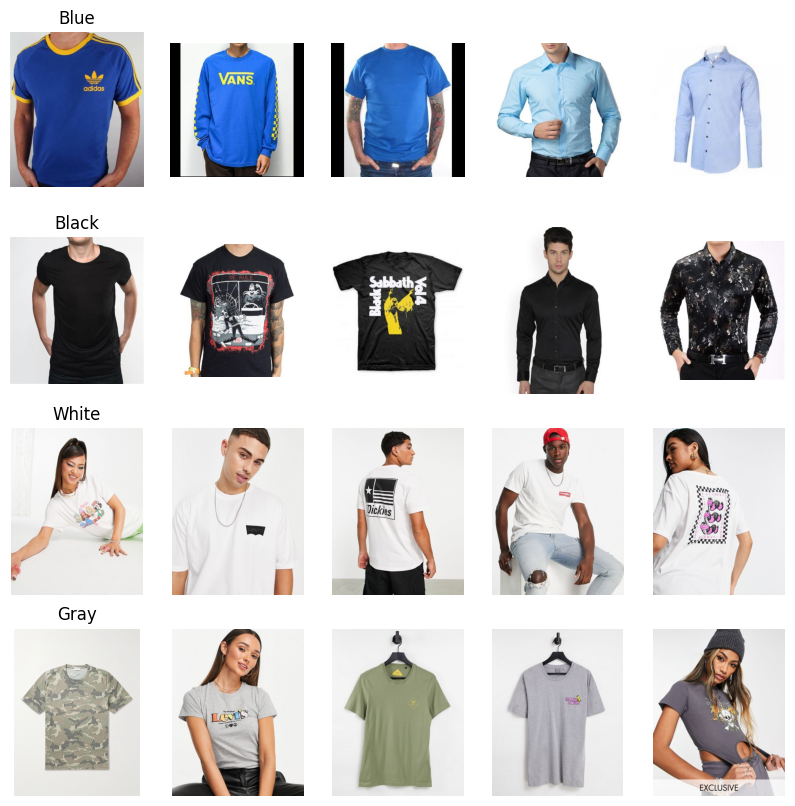

In [36]:
def display_sample_images(df, num_samples=5):
    plt.figure(figsize=(10, 10))
    categories = df['category'].unique()
    for i, category in enumerate(categories):
        plt.subplot(len(categories), num_samples, i * num_samples + 1)
        plt.title(category)
        for j in range(num_samples):
            sample = df[df['category'] == category].iloc[j]
            img = Image.open(sample['path'])
            plt.subplot(len(categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

display_sample_images(df)

### Color Distribution

In [38]:
def calculate_average_color(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return [np.nan, np.nan, np.nan]  # Handle cases where the image can't be read
    avg_color = img.mean(axis=(0, 1))  # OpenCV uses BGR order
    return avg_color


# Apply the color calculation function
df[['b_avg', 'g_avg', 'r_avg']] = pd.DataFrame(df['path'].apply(calculate_average_color).to_list(), index=df.index)

# Drop rows with NaN values
df = df.dropna(subset=['b_avg', 'g_avg', 'r_avg'])

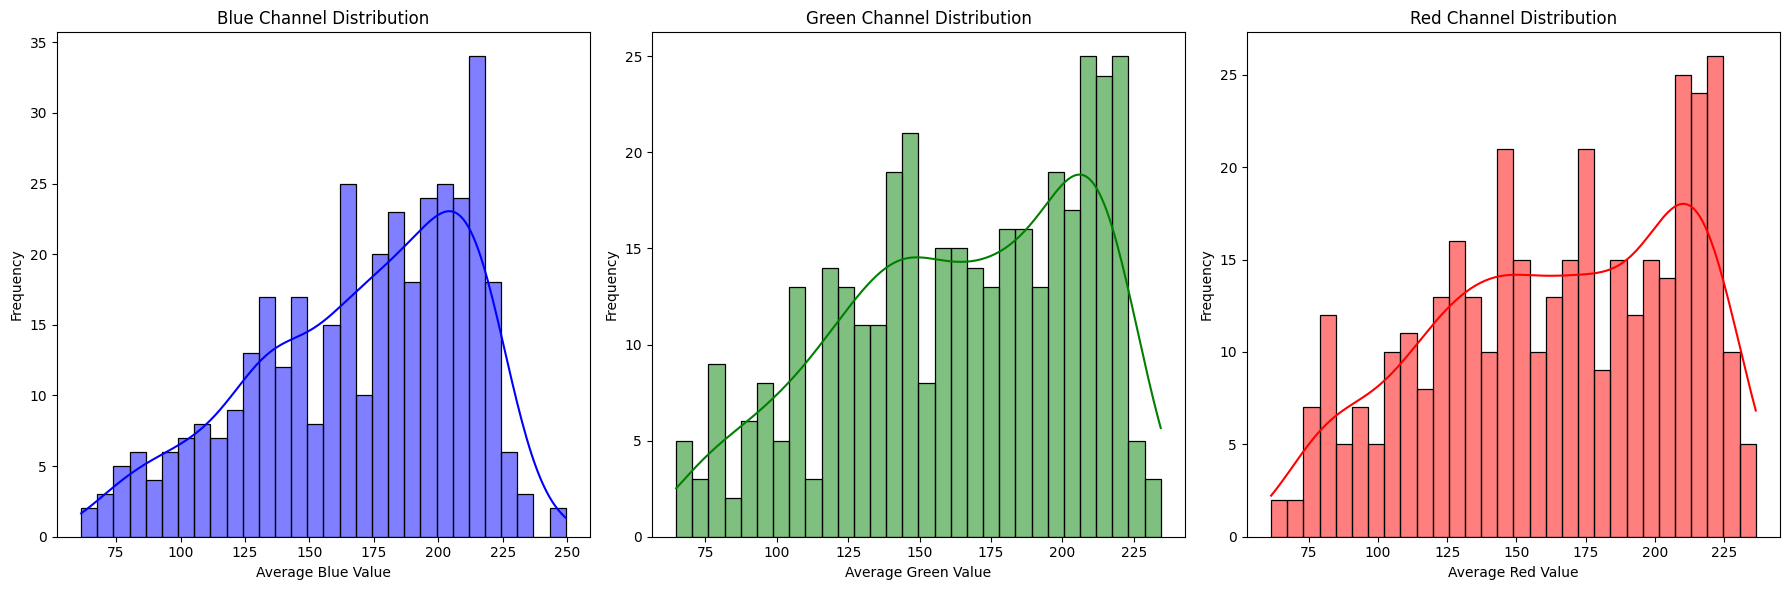

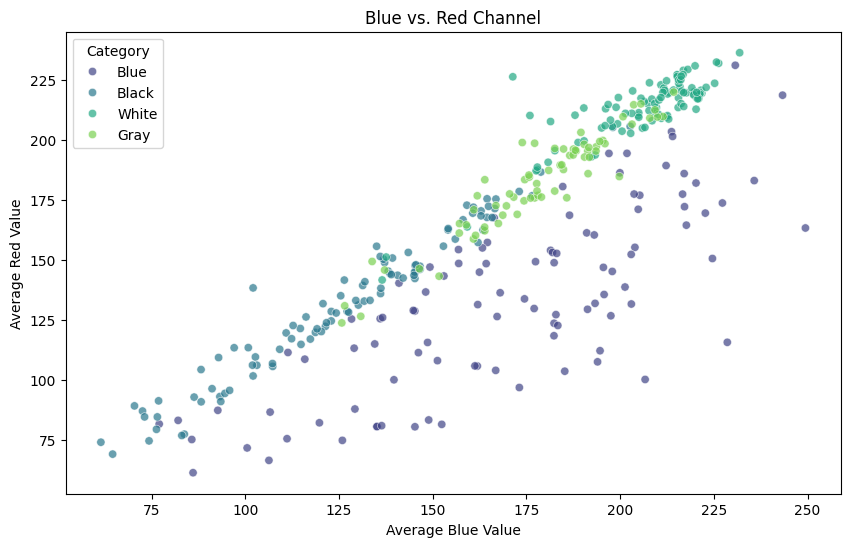

In [39]:
def plot_color_distributions(df):
    plt.figure(figsize=(18, 6))
    
    # Blue channel
    plt.subplot(1, 3, 1)
    sns.histplot(df['b_avg'], kde=True, bins=30, color='blue')
    plt.title('Blue Channel Distribution')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Frequency')

    # Green channel
    plt.subplot(1, 3, 2)
    sns.histplot(df['g_avg'], kde=True, bins=30, color='green')
    plt.title('Green Channel Distribution')
    plt.xlabel('Average Green Value')
    plt.ylabel('Frequency')

    # Red channel
    plt.subplot(1, 3, 3)
    sns.histplot(df['r_avg'], kde=True, bins=30, color='red')
    plt.title('Red Channel Distribution')
    plt.xlabel('Average Red Value')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_color_distributions(df)

# Scatter plot to analyze color relationships
def plot_color_scatter(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='b_avg', y='r_avg', hue='category', palette='viridis', alpha=0.7)
    plt.title('Blue vs. Red Channel')
    plt.xlabel('Average Blue Value')
    plt.ylabel('Average Red Value')
    plt.legend(title='Category')
    plt.show()

plot_color_scatter(df)

# Model Training

> Google Colab is used to traing the model which is then downloaded to process over and plot over the local machine.

In [ ]:
import os
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")

root_path = '/content/gdrive/MyDrive/Shirt_Classification'

results = model.train(data=os.path.join(root_path, "config.yaml"), epochs=20)

### Analytics of Model Training

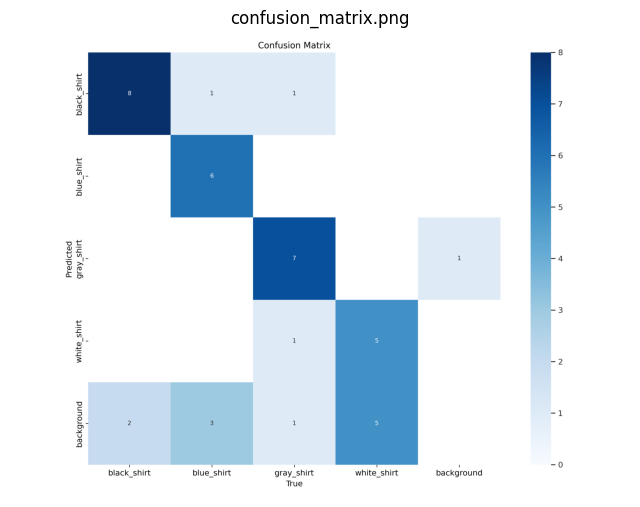

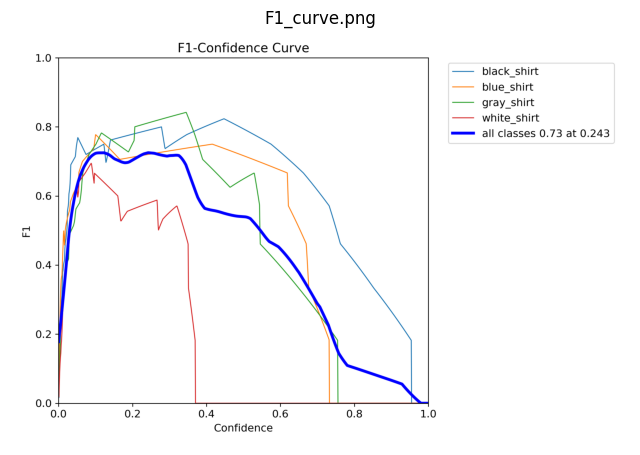

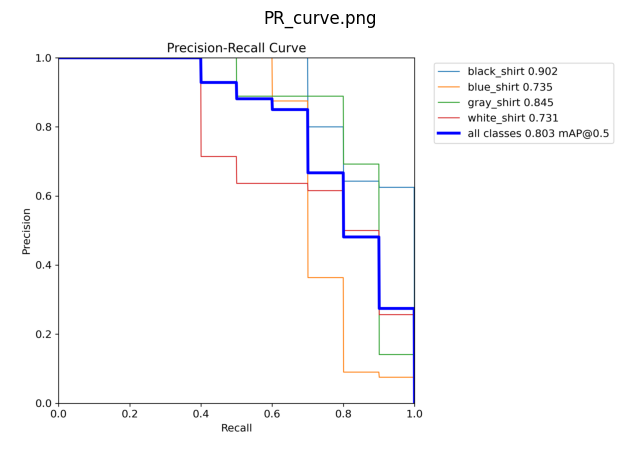

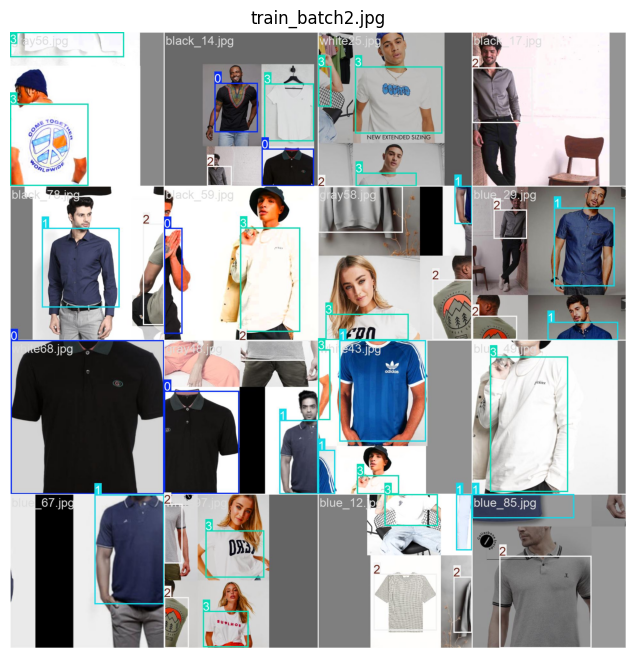

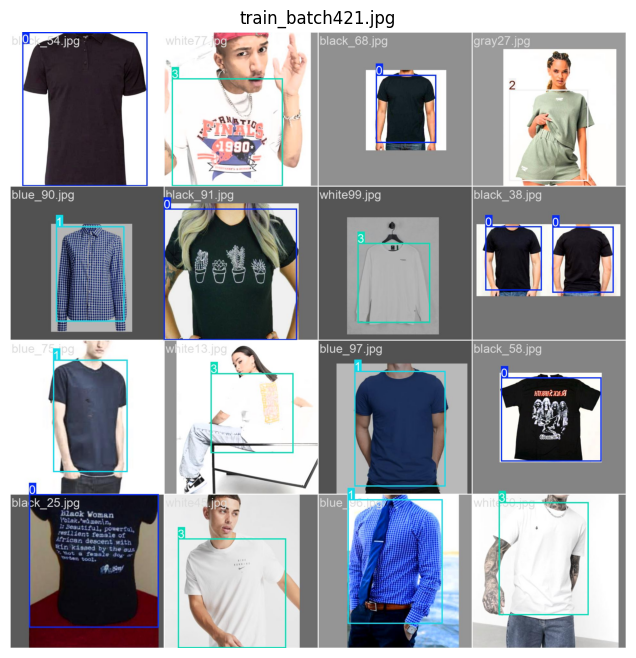

In [30]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the folder containing images
folder_path = r'C:\Users\mughe\ml1\!ML 1 Bootcamp\Shirts_detection\runs2\detect\train'

# List of image file names to display
image_names = ['confusion_matrix.png', 'F1_curve.png', 'PR_curve.png', 'train_batch2.jpg', 'train_batch421.jpg']

# Display the images
for i, image_name in enumerate(image_names):
    plt.figure(figsize=(8, 8))
    img_path = os.path.join(folder_path, image_name)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)
plt.show()


# Model Testing (in video mode)

### Import Libraries

In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [3]:
# Define model path
model_path = os.path.join('.', 'runs2', 'detect', 'train', 'weights', 'best3.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.15

# Open a connection to the webcam (0 is the default camera)
ip = "http://192.168.137.162:8080/video"
cap = cv2.VideoCapture(ip)

In [4]:

if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    if not ret:
        break

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, f'{results.names[int(class_id)].upper()}, {score}', (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 2, cv2.LINE_AA)


    cv2.imshow('Live Detection', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 288x480 1 black_shirt, 115.4ms
Speed: 0.4ms preprocess, 115.4ms inference, 15.6ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 57.2ms
Speed: 0.0ms preprocess, 57.2ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 56.2ms
Speed: 0.0ms preprocess, 56.2ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 39.0ms
Speed: 0.0ms preprocess, 39.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 43.8ms
Speed: 0.0ms preprocess, 43.8ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 46.4ms
Speed: 0.0ms preprocess, 46.4ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 49.3ms
Speed: 0.0ms preprocess, 49.3ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 480)

0: 288x480 1 black_shirt, 38.8ms
Speed: 5.1ms preprocess, 38.8ms inference, 0.0

# Model Testing (in picture mode)

In [36]:

def detect_objects(image, model, threshold=0.15):
    results = model(image)[0]
    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > threshold:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            detections.append((results.names[int(class_id)].upper(), score))
    return image, detections


In [37]:

def process_images(folder_path, model, num_images=16, threshold=0.15):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Randomly select the specified number of images
    selected_images = random.sample(image_files, num_images)
    
    # Create a subplot
    fig, axs = plt.subplots(4, 4, figsize=(20, 20))
    
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        # Perform detection on the image
        detected_image, detections = detect_objects(image, model, threshold)
        
        # Convert BGR image (OpenCV format) to RGB (Matplotlib format)
        detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
        
        # Plot the image in the corresponding subplot
        ax = axs[i // 4, i % 4]
        ax.imshow(detected_image_rgb)
        ax.axis('off')
        
        # Set the title with detection information
        if detections:
            detection_text = ", ".join([f'{cls} ({score:.2f})' for cls, score in detections])
        else:
            detection_text = "No detections"
        
        ax.set_title(f'{image_file}\n{detection_text}')
    
    plt.tight_layout()
    plt.show()



0: 480x448 1 gray_shirt, 147.6ms
Speed: 0.0ms preprocess, 147.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 448)

0: 480x480 1 gray_shirt, 63.1ms
Speed: 2.1ms preprocess, 63.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 1 gray_shirt, 72.3ms
Speed: 0.0ms preprocess, 72.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)

0: 480x384 1 black_shirt, 1 gray_shirt, 85.0ms
Speed: 12.2ms preprocess, 85.0ms inference, 15.7ms postprocess per image at shape (1, 3, 480, 384)

0: 480x480 1 blue_shirt, 77.8ms
Speed: 0.0ms preprocess, 77.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 480)

0: 480x320 1 gray_shirt, 98.6ms
Speed: 2.5ms preprocess, 98.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 320)

0: 480x480 1 gray_shirt, 117.8ms
Speed: 7.0ms preprocess, 117.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 480)

0: 480x480 1 blue_shirt, 115.5ms
Speed: 3.7ms preprocess, 115.5ms in

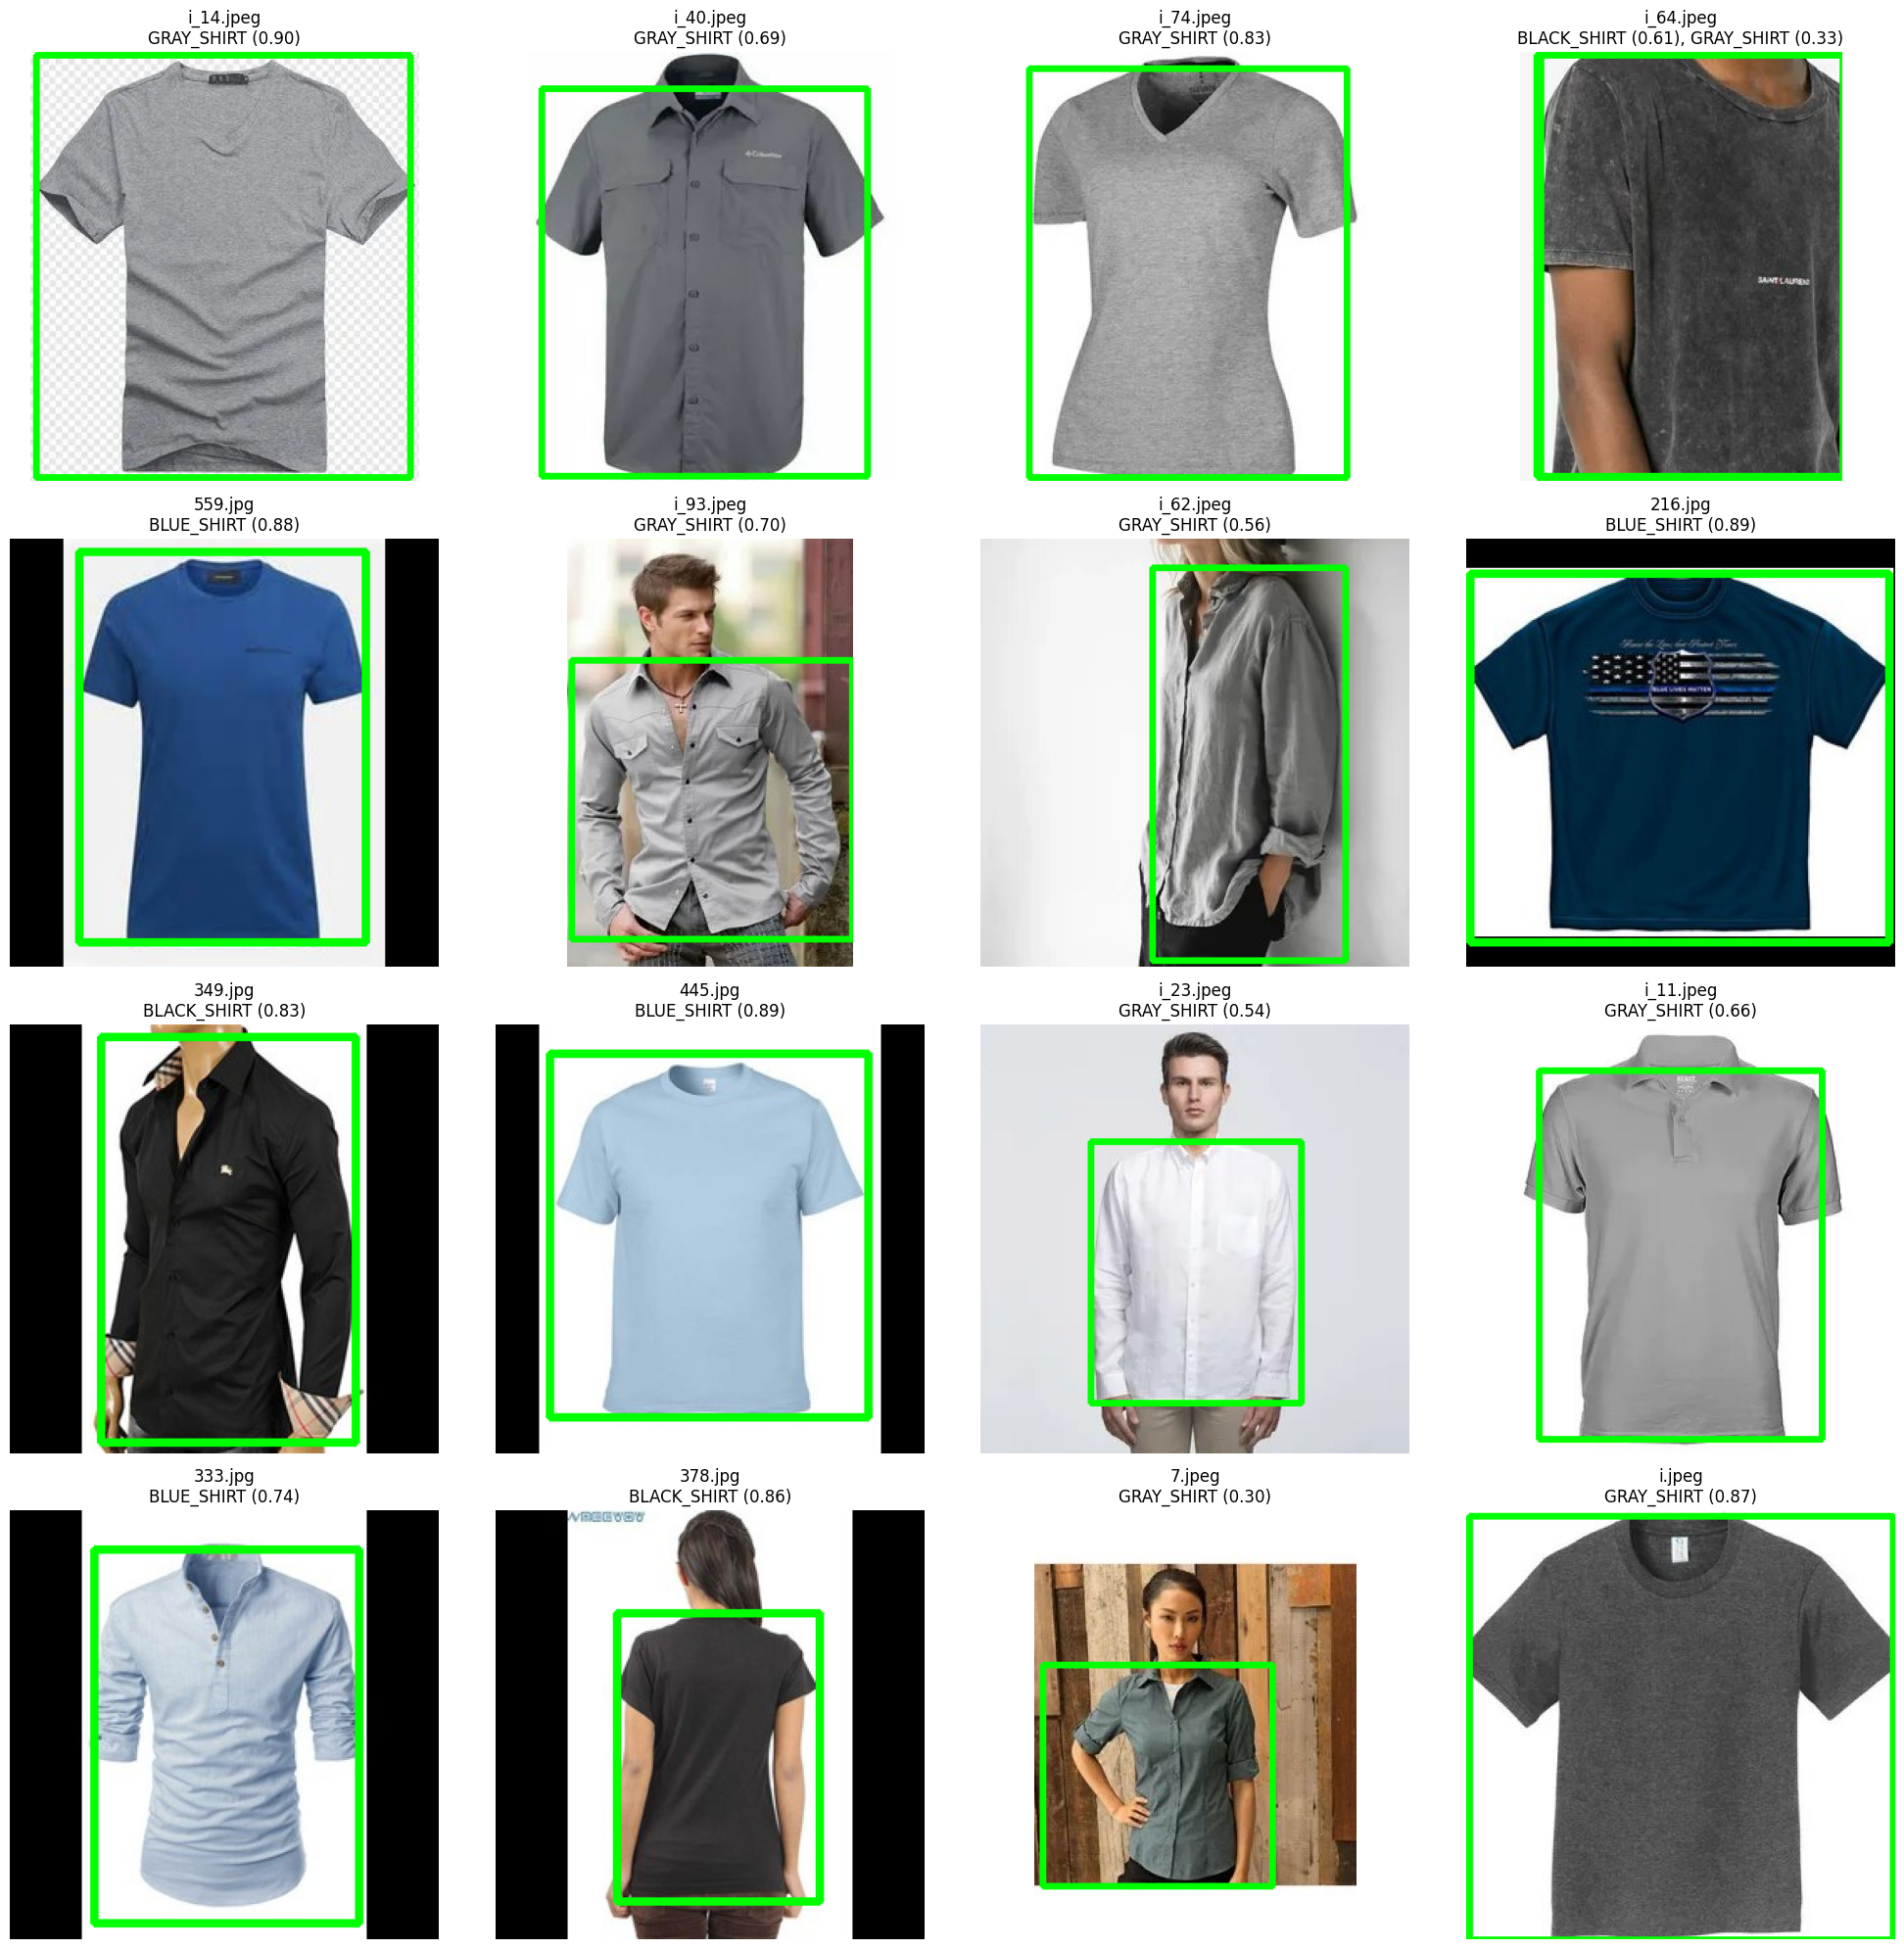

In [38]:

# Define model path
# model_path = os.path.join('.', 'runs2', 'detect', 'train', 'weights', 'last.pt')
model_path = os.path.join('.', 'runs2', 'detect', 'train', 'weights', 'best3.pt')

# Load a model
model = YOLO(model_path) 

# Define the folder path containing images
folder_path = r'C:\Users\mughe\ml1\!ML 1 Bootcamp\Shirts_detection\Test'
# folder_path = r'C:\Users\mughe\ml1\!ML 1 Bootcamp\Shirts_detection\data\images\train'

# Process and plot images
process_images(folder_path, model)


# Final Testing (given dataset)


0: 480x320 (no detections), 44.1ms
Speed: 15.6ms preprocess, 44.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 320)


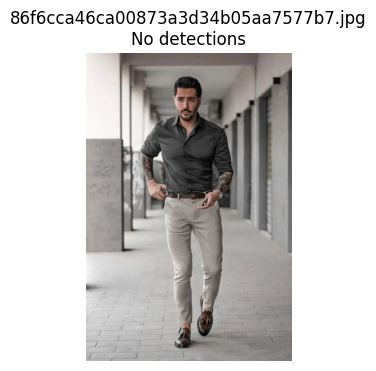


0: 480x480 1 blue_shirt, 51.1ms
Speed: 0.0ms preprocess, 51.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)


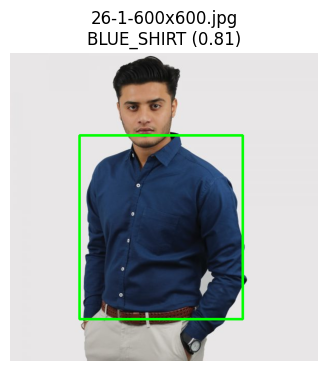


0: 480x416 1 blue_shirt, 67.9ms
Speed: 9.2ms preprocess, 67.9ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 416)


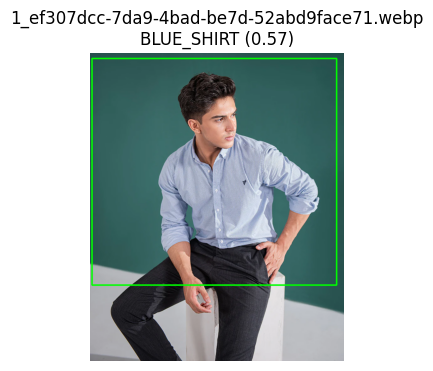


0: 480x480 1 black_shirt, 55.2ms
Speed: 0.0ms preprocess, 55.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 480)


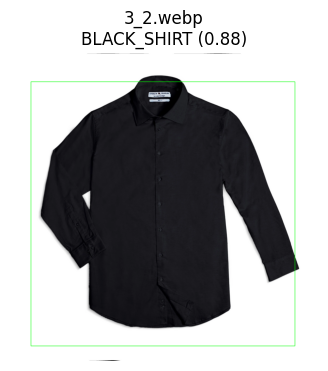


0: 480x320 1 black_shirt, 1 blue_shirt, 160.3ms
Speed: 0.0ms preprocess, 160.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 320)


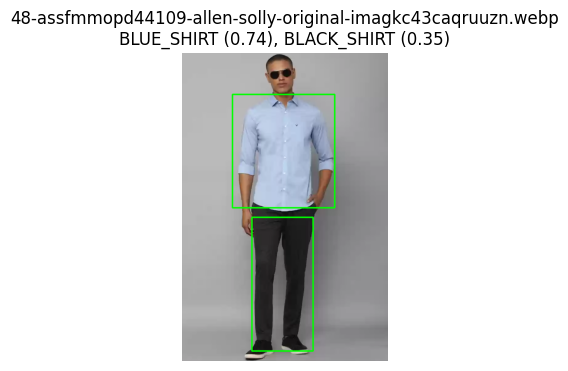

In [39]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def detect_objects(image, model, threshold=0.3):
    results = model(image)[0]
    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        if score > threshold:
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            detections.append((results.names[int(class_id)].upper(), score))
    return image, detections

def process_images(folder_path, model, num_images=4, threshold=0.15):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Randomly select the specified number of images
    selected_images = random.sample(image_files, num_images)
    
    for image_file in selected_images:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        
        # Perform detection on the image
        detected_image, detections = detect_objects(image, model, threshold)
        
        # Convert BGR image (OpenCV format) to RGB (Matplotlib format)
        detected_image_rgb = cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB)
        
        # Plot the image
        plt.figure(figsize=(4, 4))
        plt.imshow(detected_image_rgb)
        plt.axis('off')
        
        # Set the title with detection information
        if detections:
            detection_text = ", ".join([f'{cls} ({score:.2f})' for cls, score in detections])
        else:
            detection_text = "No detections"
        
        plt.title(f'{image_file}\n{detection_text}')
        plt.show()

# Define model path
model_path = os.path.join('.', 'runs2', 'detect', 'train', 'weights', 'best3.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

# Define the folder path containing images
folder_path = r'C:\Users\mughe\ml1\!ML 1 Bootcamp\Shirts_detection\test_final'

# Process images
process_images(folder_path, model, num_images=5, threshold=0.15)


# Data Augementation
> For the sake of improving the results, data is augmented.

In [ ]:
import os
import cv2
import albumentations as A
from glob import glob
import random

# Define paths
images_path = 'images/train'
labels_path = 'labels/train'
augmented_images_path = 'augmented_images'
augmented_labels_path = 'augmented_labels'

# Ensure the augmented directories exist
os.makedirs(augmented_images_path, exist_ok=True)
os.makedirs(augmented_labels_path, exist_ok=True)

# Define the augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.Rotate(limit=45, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.HueSaturationValue(p=0.2),
    A.RandomResizedCrop(height=640, width=640, scale=(0.8, 1.0), p=1.0)
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

def read_image(image_path):
    return cv2.imread(image_path)

def read_label(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file:
            parts = line.strip().split()
            label = int(parts[0])
            bbox = list(map(float, parts[1:]))
            labels.append((label, bbox))
    return labels

def save_image(image, image_path):
    cv2.imwrite(image_path, image)

def save_label(labels, label_path):
    with open(label_path, 'w') as file:
        for label, bbox in labels:
            file.write(f"{label} {' '.join(map(str, bbox))}\n")

def augment_data(image_path, label_path, transform):
    image = read_image(image_path)
    labels = read_label(label_path)

    class_labels = [label for label, bbox in labels]
    bboxes = [bbox for label, bbox in labels]

    augmented = transform(image=image, bboxes=bboxes, class_labels=class_labels)

    augmented_image = augmented['image']
    augmented_bboxes = augmented['bboxes']
    augmented_labels = [(class_labels[i], augmented_bboxes[i]) for i in range(len(class_labels))]

    return augmented_image, augmented_labels

def main():
    image_files = glob(os.path.join(images_path, '*.jpg'))

    for image_file in image_files:
        label_file = os.path.join(labels_path, os.path.basename(image_file).replace('.jpg', '.txt'))
        
        for i in range(5):  # Number of augmentations per image
            augmented_image, augmented_labels = augment_data(image_file, label_file, transform)
            
            augmented_image_file = os.path.join(augmented_images_path, f"{os.path.splitext(os.path.basename(image_file))[0]}aug{i}.jpg")
            augmented_label_file = os.path.join(augmented_labels_path, f"{os.path.splitext(os.path.basename(label_file))[0]}aug{i}.txt")
            
            save_image(augmented_image, augmented_image_file)
            save_label(augmented_labels, augmented_label_file)

if __name__ == '__main__':
    main()